In [37]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sb
import xarray as xr
import os.path as path
import matplotlib.pyplot as plt
from aux.ml_flood_config import path_to_data
from aux.utils import calc_stat_moments
from aux.plot import Map
import seaborn as sns

from dask.distributed import Client
client = Client(processes=True)
import dask
#dask.config.set(scheduler='processes')
from dask.diagnostics import ProgressBar

/opt/anaconda3/lib/python3.7/site-packages/distributed/bokeh/core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


## Calculate various statistical measures across the data and create plots

In [38]:
# define some vars
data_path = f'{path_to_data}danube/'
ds = xr.open_mfdataset(data_path+'*era5*')
print(data_path)
print(ds)

/home/srvx11/lehre/users/a1303583/ipython/ml_flood/data/danube/
<xarray.Dataset>
Dimensions:    (latitude: 13, level: 3, longitude: 53, time: 13514)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01T23:00:00 ... 2017-12-31T23:00:00
  * longitude  (longitude) float32 7.0 7.25 7.5 7.75 ... 19.25 19.5 19.75 20.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 47.5 47.25 47.0
  * level      (level) float64 850.0 700.0 500.0
Data variables:
    cp         (time, latitude, longitude) float32 dask.array<shape=(13514, 13, 53), chunksize=(13514, 13, 53)>
    tp         (time, latitude, longitude) float32 dask.array<shape=(13514, 13, 53), chunksize=(13514, 13, 53)>
    slt        (time, latitude, longitude) float32 dask.array<shape=(13514, 13, 53), chunksize=(13514, 13, 53)>
    z          (time, latitude, longitude, level) float32 dask.array<shape=(13514, 13, 53, 3), chunksize=(13514, 13, 53, 3)>
    slor       (time, latitude, longitude) float32 dask.array<shape=(13514, 

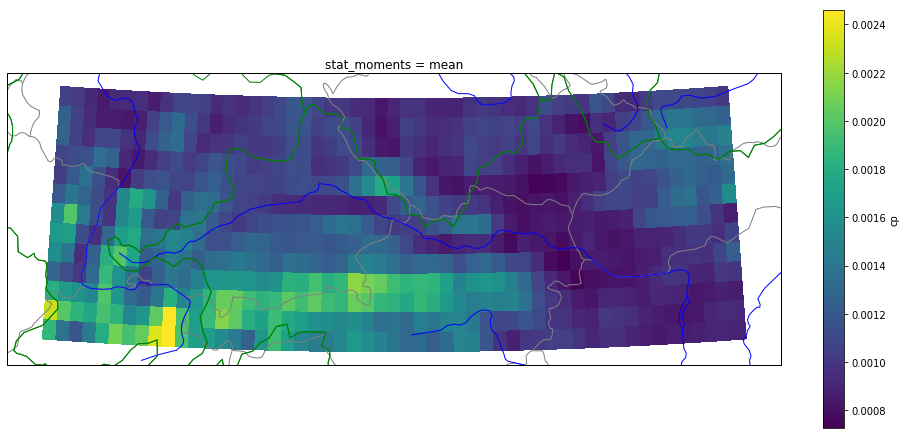

In [39]:
sm = calc_stat_moments(ds, dim_aggregator='time', time_constraint=None)
m = Map(figure_kws=dict(figsize=(15,10)))



da_mean = sm['cp'].sel(stat_moments='mean').compute()
#print(da_mean)
#print(da_std)
m.plot(da_mean)
plt.show()

(<Figure size 1080x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2ad7a97837f0>)

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:50602 remote=tcp://127.0.0.1:43042>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:36130 remote=tcp://127.0.0.1:39558>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:39582 remote=tcp://127.0.0.1:45712>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:38591 remote=tcp://127.0.0.1:37630>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:36426 remote=tcp://127.0.0.1:39558>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:39831 remote=tcp://127.0.0.1:45712>


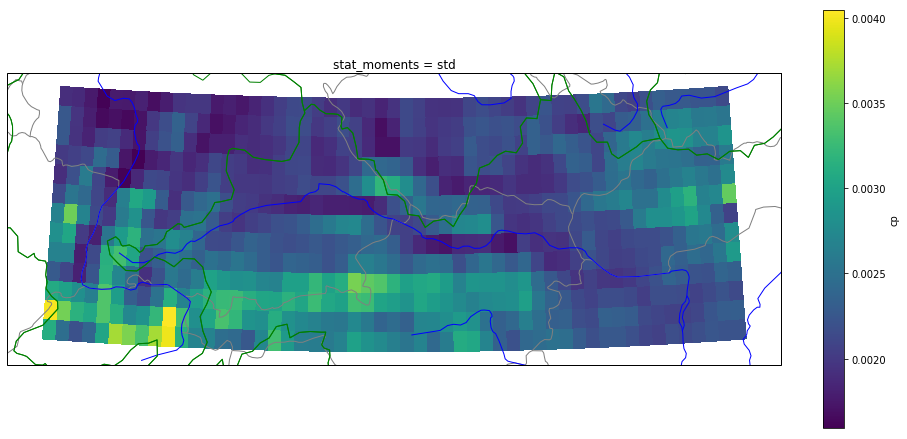

In [40]:
da_std = sm['cp'].sel(stat_moments='std').compute()
m.plot(da_std)

In [61]:
def plot_ts(da, key):
    """Plot a times series for a given xarray dataarray.
    """
    p = sns.lineplot(data=da.to_pandas(), linewidth=2)
    p.set_xlabel('time')
    p.set_ylabel(key)

In [62]:
sm = calc_stat_moments(ds, dim_aggregator='spatial', time_constraint=None)
#print(sm)

<xarray.DataArray 'lsp' (time: 13514)>
dask.array<shape=(13514,), dtype=float32, chunksize=(13514,)>
Coordinates:
  * time          (time) datetime64[ns] 1981-01-01T23:00:00 ... 2017-12-31T23:00:00
    stat_moments  <U4 'mean'
<xarray.DataArray 'lsp' (time: 37)>
dask.array<shape=(37,), dtype=float32, chunksize=(1,)>
Coordinates:
  * time          (time) datetime64[ns] 1981-12-31 1982-12-31 ... 2017-12-31
    stat_moments  <U4 'mean'
<xarray.DataArray 'lsp' (time: 37)>
dask.array<shape=(37,), dtype=float32, chunksize=(1,)>
Coordinates:
  * time          (time) datetime64[ns] 1981-12-31 1982-12-31 ... 2017-12-31
    stat_moments  <U4 'mean'


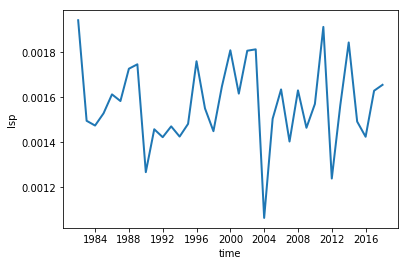

In [63]:
key = 'lsp'
da = sm[key].sel(stat_moments='mean')
print(da)
print(da.resample(time="y").mean())

da = da.resample(time="y").mean()

plot_ts(da=da, key='lsp')


print(da)
plt.show()

In [8]:
a = 'asdoasjkdaasdadsadasdasd.nc'
print(a)

asdoasjkdaasdadsadasdasd.nc


In [11]:
print(f"asda{''.join(a.split('.')[:-1])}asdasd")

asdaasdoasjkdaasdadsadasdasdasdasd
